## Load the Datset

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


# Load the train_df
train_df = pd.read_csv('./data/dataset_train.csv')
train_df.drop('Index', axis=1, inplace=True)


# Display the first few rows of the train_df
train_df.head(10)

,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
5,Slytherin,Corrine,Hammond,1999-04-04,Right,21209.0,-613.687160,-4.289197,6.136872,-6.592,-440.997704,396.201804,5.380286,1052.845164,11.751212,1.049894,-247.94549,-34.69
6,Gryffindor,Tom,Guido,2000-09-30,Left,49167.0,628.046051,-4.861976,-6.280461,NaN,-926.892512,583.742442,-7.322486,923.539573,1.646666,0.153022,-257.83447,261.55
7,Hufflepuff,Alicia,Hayward,1997-07-08,Right,33010.0,411.412727,5.931832,-4.114127,2.769,-502.021336,439.351416,NaN,1041.091935,6.581791,-0.171704,-244.03492,72.25
8,Gryffindor,Bella,Leatherman,1998-12-07,Left,20278.0,496.394945,-5.215891,-4.963949,5.855,-626.552041,567.842402,-6.198661,925.255500,1.086518,1.147032,-252.27561,244.11
9,Hufflepuff,Hayden,Aponte,2001-10-13,Right,46316.0,527.193585,7.922205,-5.271936,3.356,-398.101991,341.475606,4.978614,1041.414665,2.068824,-0.529579,-244.57527,-0.09


## V.1 Data Analysis

In [32]:
numerical_columns = [col for col in train_df.columns if train_df[col].dtype != 'object']
numerical_columns

['Arithmancy',
 'Astronomy',
 'Herbology',
 'Defense Against the Dark Arts',
 'Divination',
 'Muggle Studies',
 'Ancient Runes',
 'History of Magic',
 'Transfiguration',
 'Potions',
 'Care of Magical Creatures',
 'Charms',
 'Flying']

In [33]:
categorical_cols = [col for col in train_df.columns if train_df[col].dtype == 'object']
categorical_cols

['Hogwarts House', 'First Name', 'Last Name', 'Birthday', 'Best Hand']

In [34]:
train_df['Hogwarts House'].unique()

array(['Ravenclaw', 'Slytherin', 'Gryffindor', 'Hufflepuff'], dtype=object)

In [35]:
train_df['Birthday']

0       2000-03-30
1       1999-10-14
2       1999-11-03
3       2000-08-19
4       1998-09-27
           ...    
1595    2001-09-14
1596    1998-03-12
1597    1999-10-24
1598    2001-09-21
1599    2000-08-21
Name: Birthday, Length: 1600, dtype: object

In [36]:
train_df['Best Hand'].unique()

array(['Left', 'Right'], dtype=object)

In [37]:
stats = pd.DataFrame(index=numerical_columns, columns=['count', 'mean','std','min','25%','50%','75%','max'])
stats

,count,mean,std,min,25%,50%,75%,max
Arithmancy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Astronomy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Herbology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Defense Against the Dark Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Divination,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Muggle Studies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ancient Runes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
History of Magic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transfiguration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Potions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
import math

def calculate_statistics(column):
    # Initialize variables
    count = 0
    total = 0
    min_val = float('inf')
    max_val = -float('inf')
    values = []
    
    # Iterate over the column
    for val in column:
        # Check if the value is not NaN
        if not math.isnan(val):
            # Increment count
            count += 1
            # Add to total
            total += val
            # Update min and max
            min_val = min(min_val, val)
            max_val = max(max_val, val)
            # Append value to list
            values.append(val)
    
    # Sort the list of values
    values.sort()
    
    # Calculate mean
    mean = total / count
    
    # Calculate variance
    variance = sum((x - mean) ** 2 for x in values) / count
    
    # Calculate standard deviation
    std_dev = math.sqrt(variance)
    
    # Calculate percentiles
    percentile_25 = values[int(count * 0.25) - 1]
    percentile_50 = values[int(count * 0.50) - 1]
    percentile_75 = values[int(count * 0.75) - 1]
    
    # Return statistics
    return count, mean, std_dev, min_val, percentile_25, percentile_50, percentile_75, max_val


# Calculate statistics for the 'Arithmancy' column
arithmancy_stats = calculate_statistics(train_df['Arithmancy'])
arithmancy_stats

(1566,
 49634.57024265645,
 16674.47957652662,
 -24370.0,
 38491.0,
 49009.0,
 60761.0,
 104956.0)

In [39]:
for col_nm in stats.index:
    arithmancy_stats = calculate_statistics(train_df[col_nm])
    stats.loc[col_nm] = arithmancy_stats

In [40]:
stats

,count,mean,std,min,25%,50%,75%,max
Arithmancy,1566,49634.570243,16674.479577,-24370.0,38491.0,49009.0,60761.0,104956.0
Astronomy,1568,39.797131,520.13233,-966.740546,-489.724217,258.934161,524.392752,1016.21194
Herbology,1567,1.14102,5.218016,-10.295663,-4.316909,3.466784,5.417321,11.612895
Defense Against the Dark Arts,1569,-0.387863,5.211132,-10.162119,-5.263325,-2.616447,4.89769,9.667405
Divination,1561,3.15391,4.15397,-8.727,3.089,4.621,5.666,10.032
Muggle Studies,1565,-224.589915,486.189433,-1086.496835,-578.064907,-419.662542,254.625063,1092.388611
Ancient Runes,1565,495.74797,106.251202,283.869609,397.359577,463.304078,597.329744,745.39622
History of Magic,1557,2.963095,4.424353,-8.858993,2.211949,4.377433,5.812541,11.889713
Transfiguration,1566,1030.096946,44.111025,906.62732,1026.14991,1045.480657,1058.409478,1098.958201
Potions,1570,5.950373,3.146852,-4.697484,3.642031,5.872093,8.246324,13.536762


In [41]:
numerical_data = train_df[numerical_columns]
desc_stats = numerical_data.describe()
desc_stats = desc_stats.transpose()
desc_stats

,count,mean,std,min,25%,50%,75%,max
Arithmancy,1566.0,49634.570243,16679.806036,-24370.000000,38511.500000,49013.500000,60811.250000,104956.000000
Astronomy,1568.0,39.797131,520.298268,-966.740546,-489.551387,260.289446,524.771949,1016.211940
Herbology,1567.0,1.141020,5.219682,-10.295663,-4.308182,3.469012,5.419183,11.612895
Defense Against the Dark Arts,1569.0,-0.387863,5.212794,-10.162119,-5.259095,-2.589342,4.904680,9.667405
Divination,1561.0,3.153910,4.155301,-8.727000,3.099000,4.624000,5.667000,10.032000
Muggle Studies,1565.0,-224.589915,486.344840,-1086.496835,-577.580096,-419.164294,254.994857,1092.388611
Ancient Runes,1565.0,495.747970,106.285165,283.869609,397.511047,463.918305,597.492230,745.396220
History of Magic,1557.0,2.963095,4.425775,-8.858993,2.218653,4.378176,5.825242,11.889713
Transfiguration,1566.0,1030.096946,44.125116,906.627320,1026.209993,1045.506996,1058.436410,1098.958201
Potions,1570.0,5.950373,3.147854,-4.697484,3.646785,5.874837,8.248173,13.536762


## V.2 Data Visualization 1

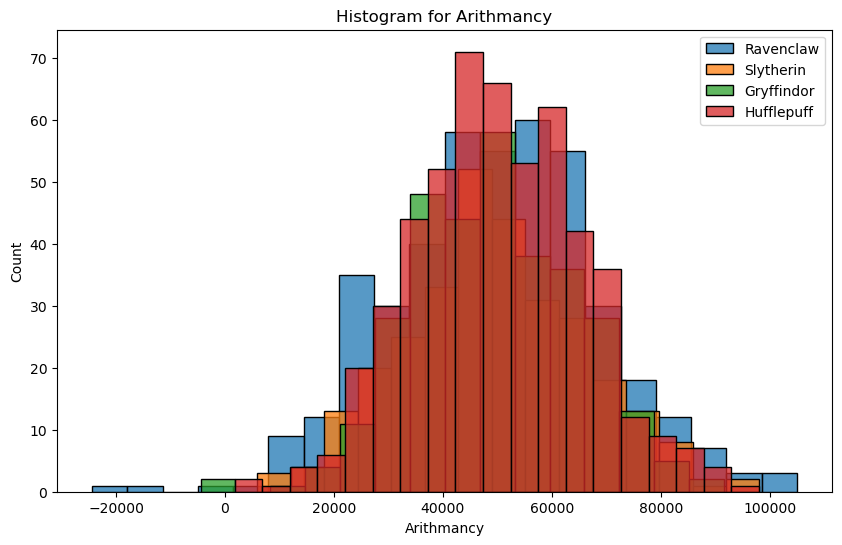

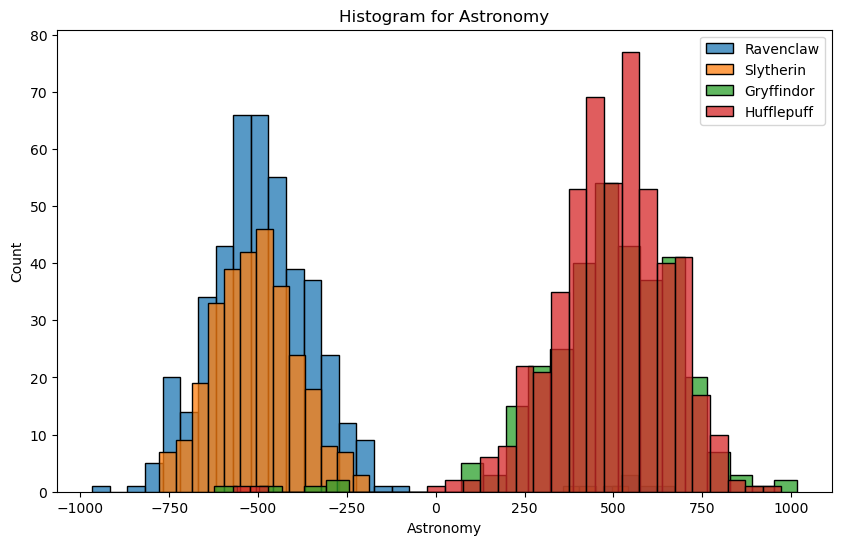

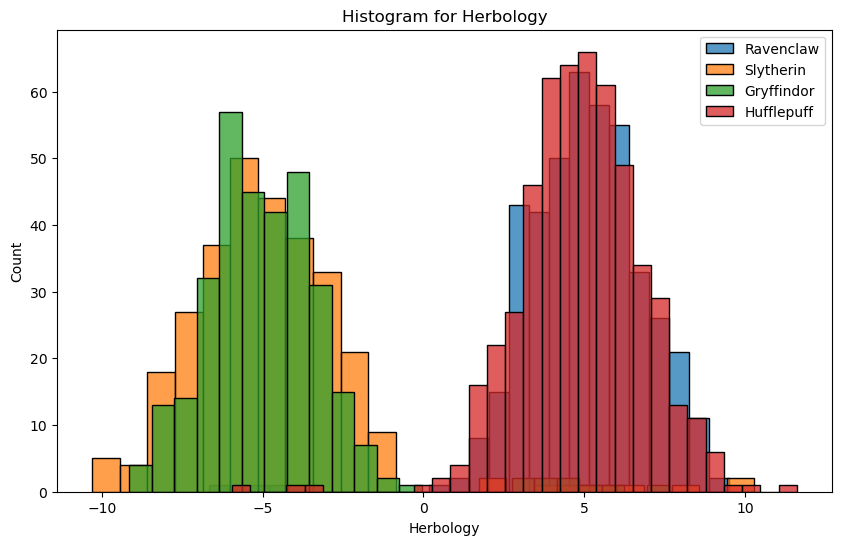

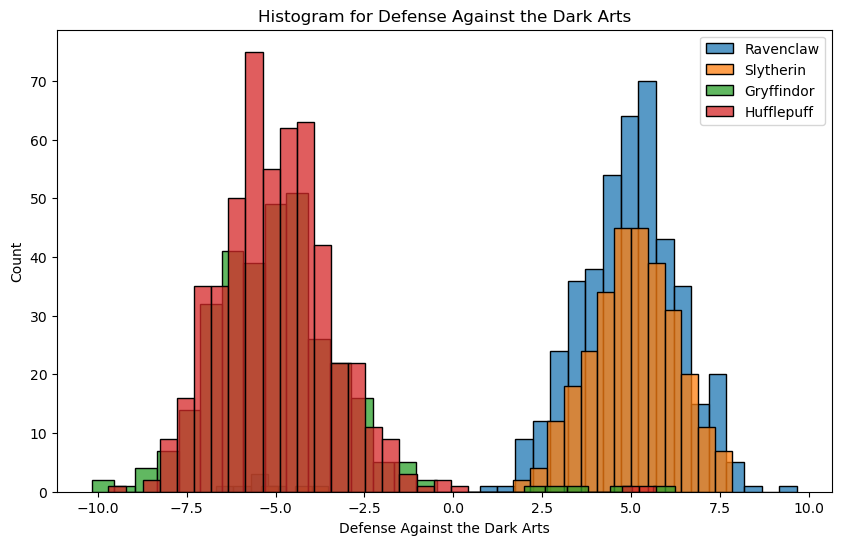

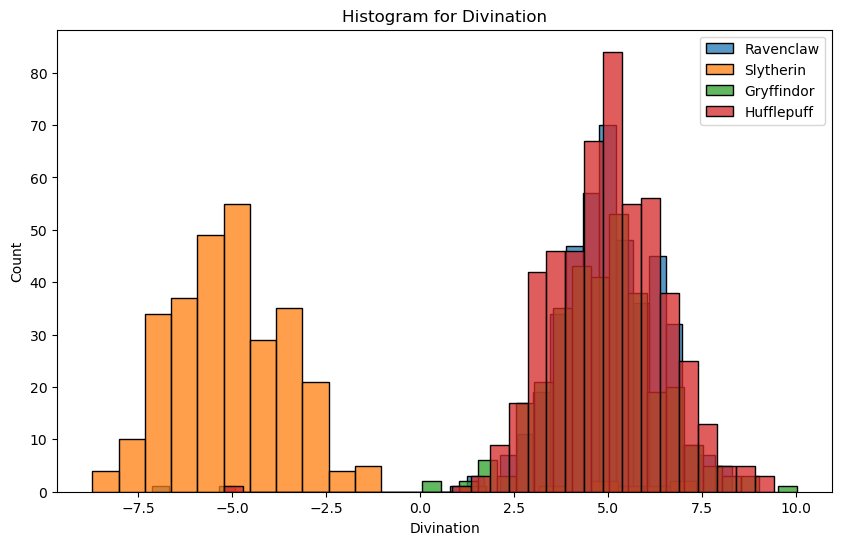

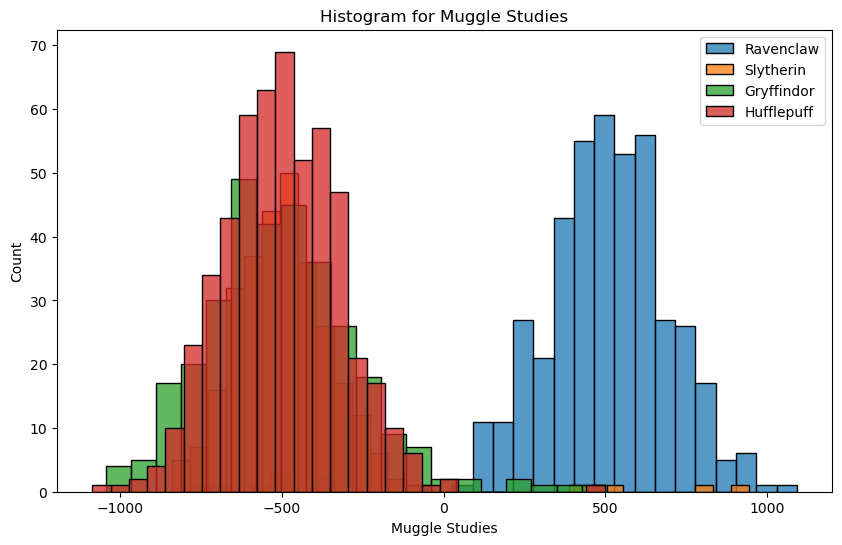

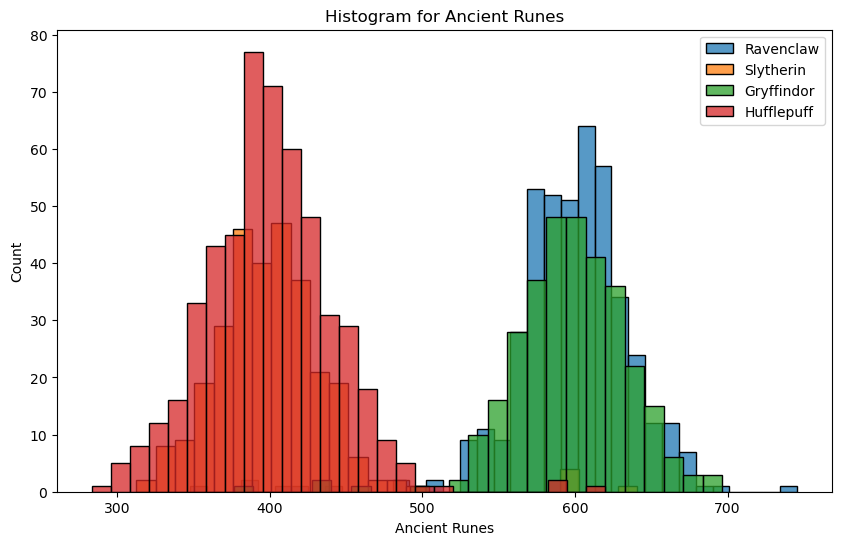

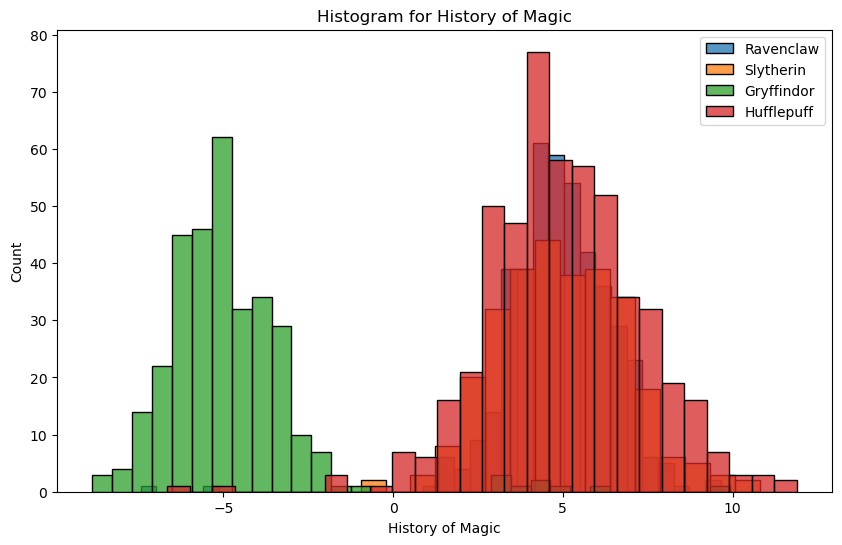

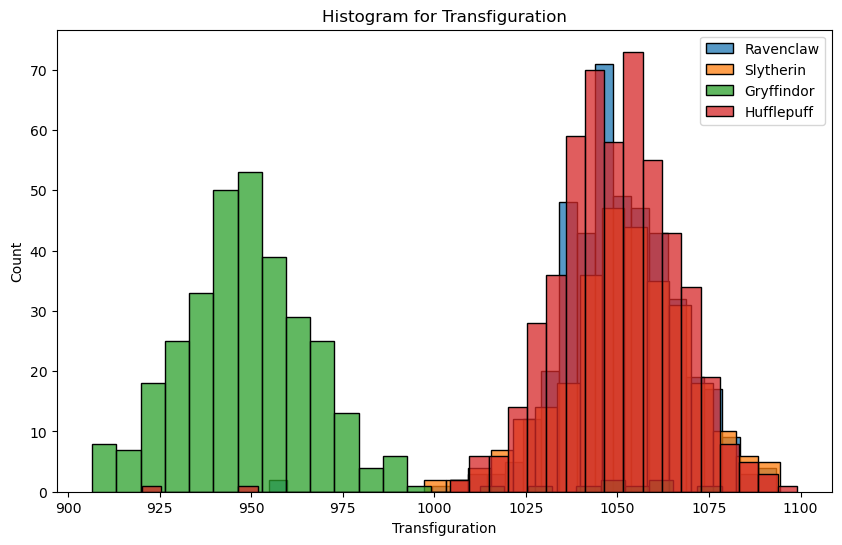

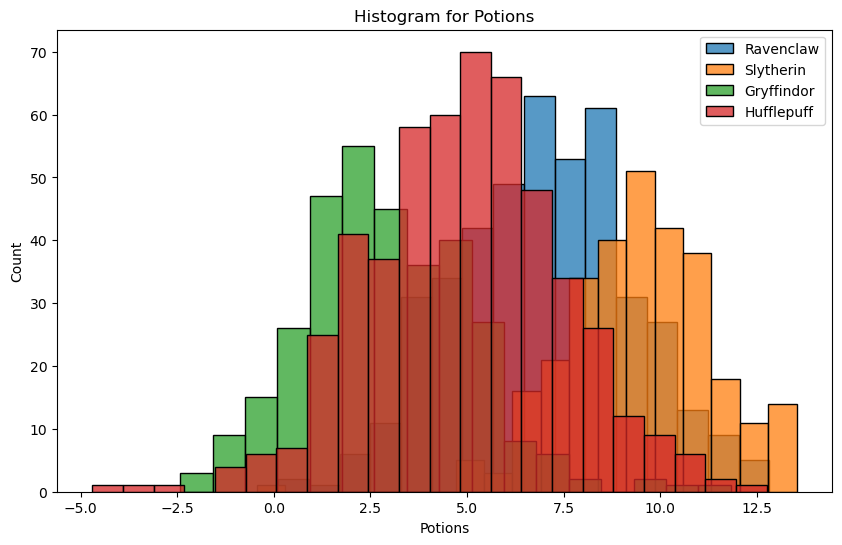

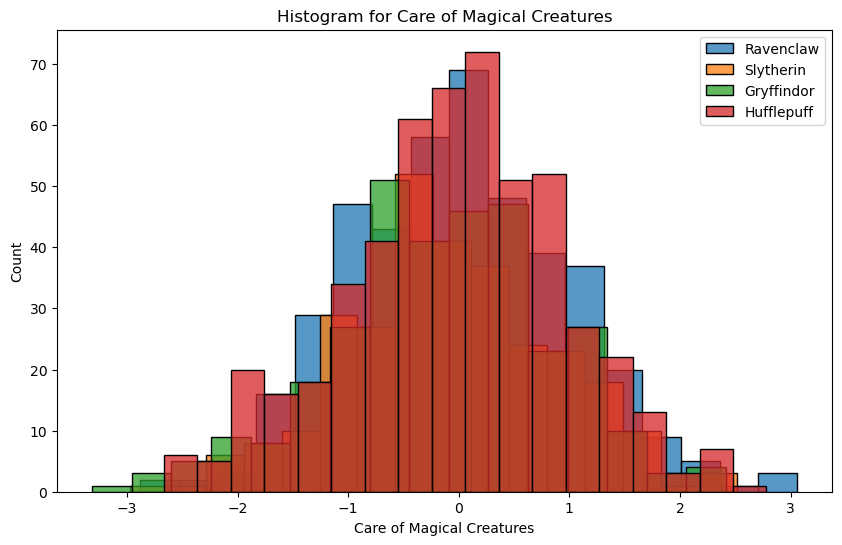

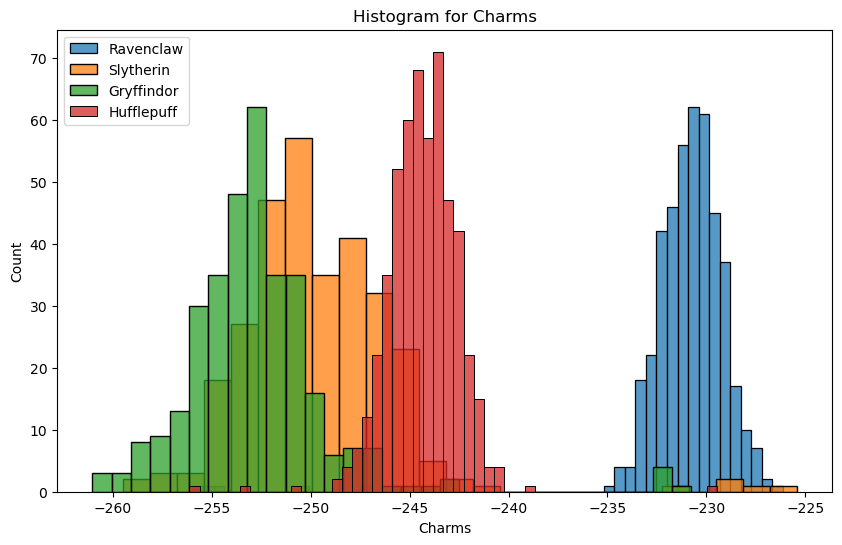

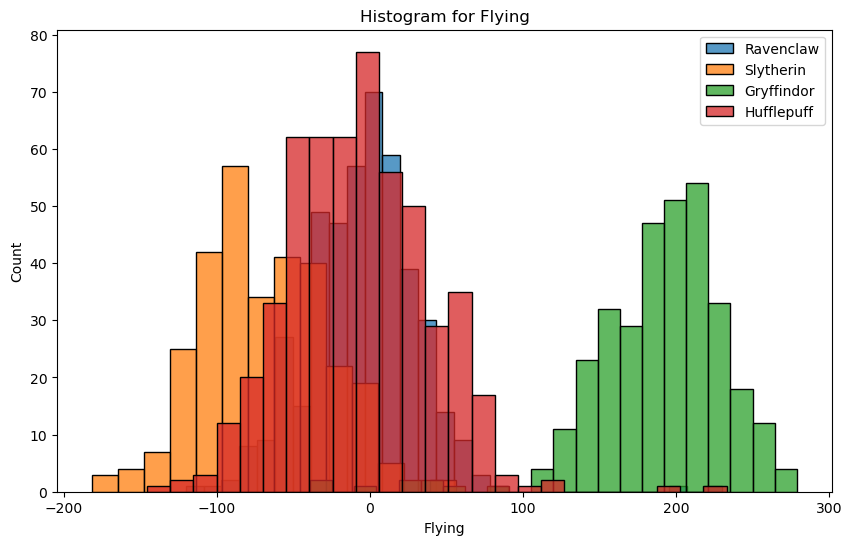

In [42]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define the houses and courses
houses = train_df['Hogwarts House'].unique()
courses = numerical_columns

# Plot histograms for each course for each house
for course in courses:
    plt.figure(figsize=(10, 6))
    for house in houses:
        subset = train_df[train_df['Hogwarts House'] == house]
        sns.histplot(subset[course], kde=False, label=house)
    plt.title(f'Histogram for {course}')
    plt.legend()
    plt.show()


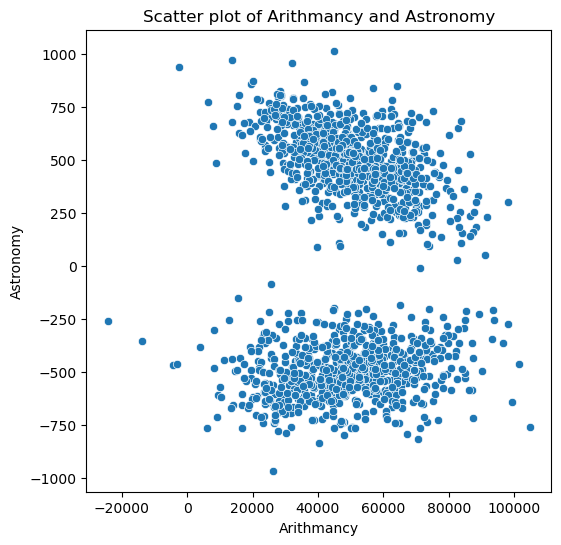

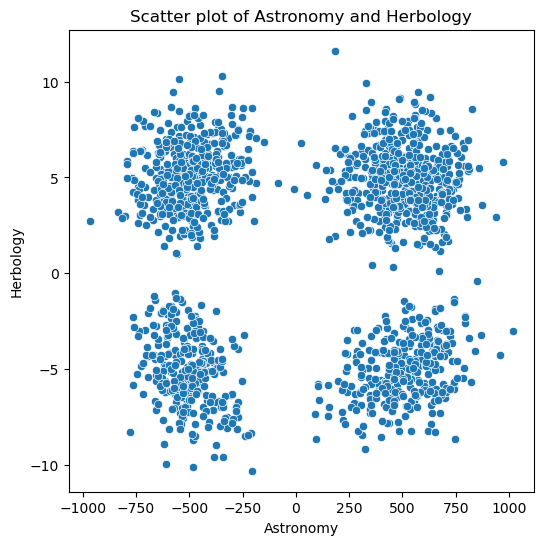

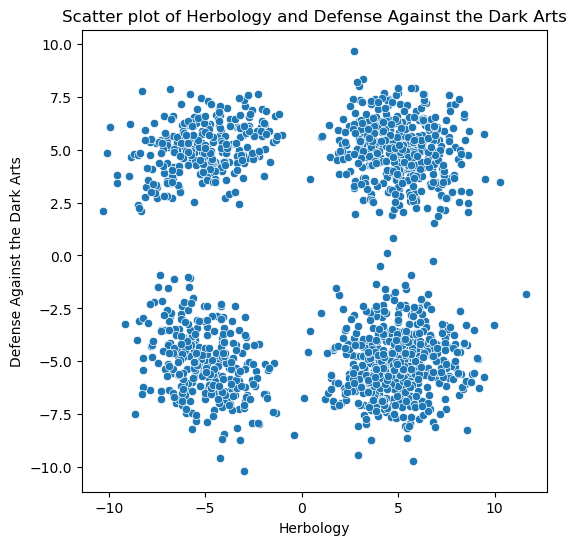

In [43]:
# Define the pairs of features
feature_pairs = [('Arithmancy', 'Astronomy'), ('Astronomy', 'Herbology'), ('Herbology', 'Defense Against the Dark Arts')]

# Plot scatter plots for each pair of features
for pair in feature_pairs:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(data=train_df, x=pair[0], y=pair[1])
    plt.title(f'Scatter plot of {pair[0]} and {pair[1]}')
    plt.show()

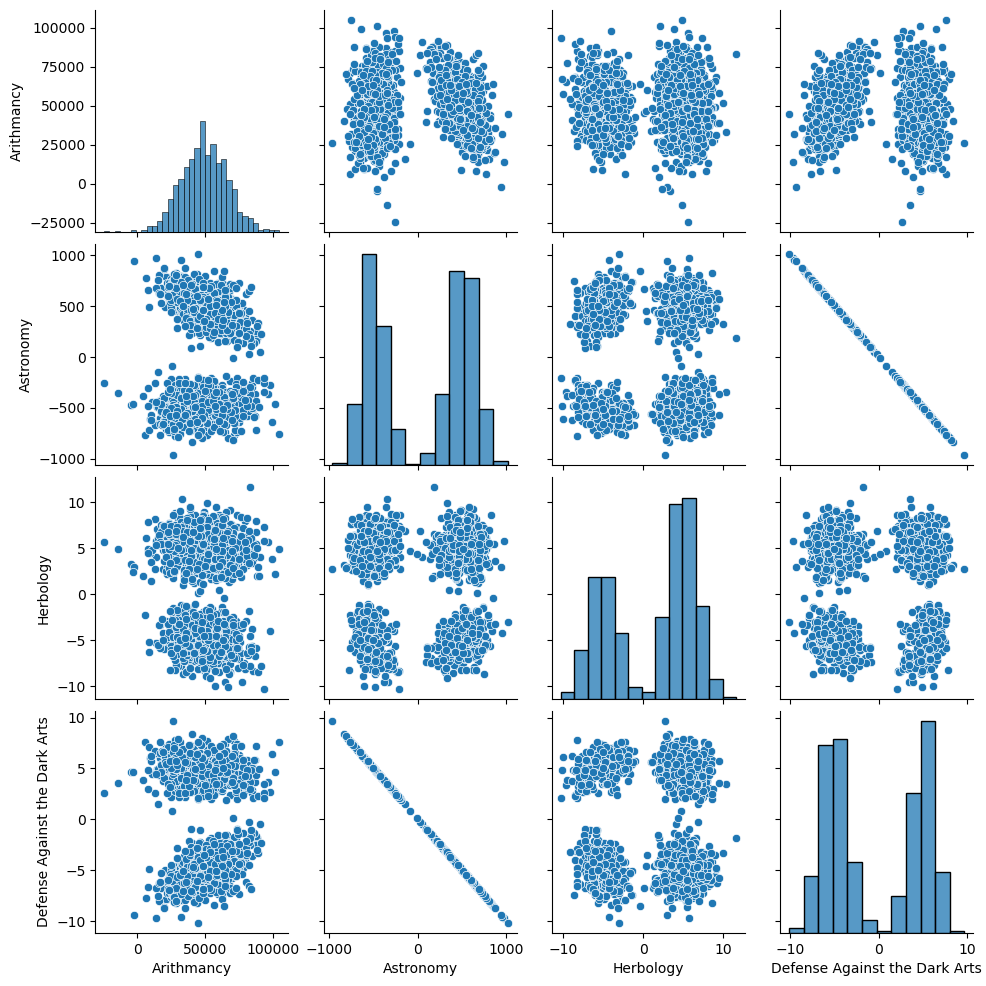

In [44]:
# Select the first four numerical features
selected_features = numerical_columns[:4]

# Plot a pair plot for these features
sns.pairplot(train_df[selected_features].dropna())
plt.show()

## EDA

### Initial Data Analysis

Let's perform some initial exploratory data analysis:

1. Check the data types and missing values
2. Check the summary statistics
3. Check the distribution of the target variable (Hogwarts House)
4. Visualize the correlation between the numerical variables
5. Check the distribution of the numerical variables
6. Analyze the categorical variables


#### Check the data types and missing values


In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Hogwarts House                 1600 non-null   object 
 1   First Name                     1600 non-null   object 
 2   Last Name                      1600 non-null   object 
 3   Birthday                       1600 non-null   object 
 4   Best Hand                      1600 non-null   object 
 5   Arithmancy                     1566 non-null   float64
 6   Astronomy                      1568 non-null   float64
 7   Herbology                      1567 non-null   float64
 8   Defense Against the Dark Arts  1569 non-null   float64
 9   Divination                     1561 non-null   float64
 10  Muggle Studies                 1565 non-null   float64
 11  Ancient Runes                  1565 non-null   float64
 12  History of Magic               1557 non-null   f

#### Distribution of the target variable

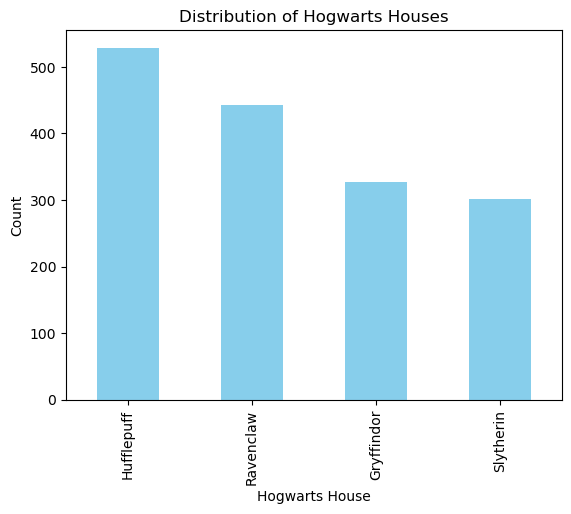

In [46]:
train_df['Hogwarts House'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Hogwarts House')
plt.ylabel('Count')
plt.title('Distribution of Hogwarts Houses')
plt.show()

#### Correlation matrix (correlation between the numerical variables)

This will help us understand the relationships between different features, which is important when selecting features for our model. We'll use a heatmap for this purpose.

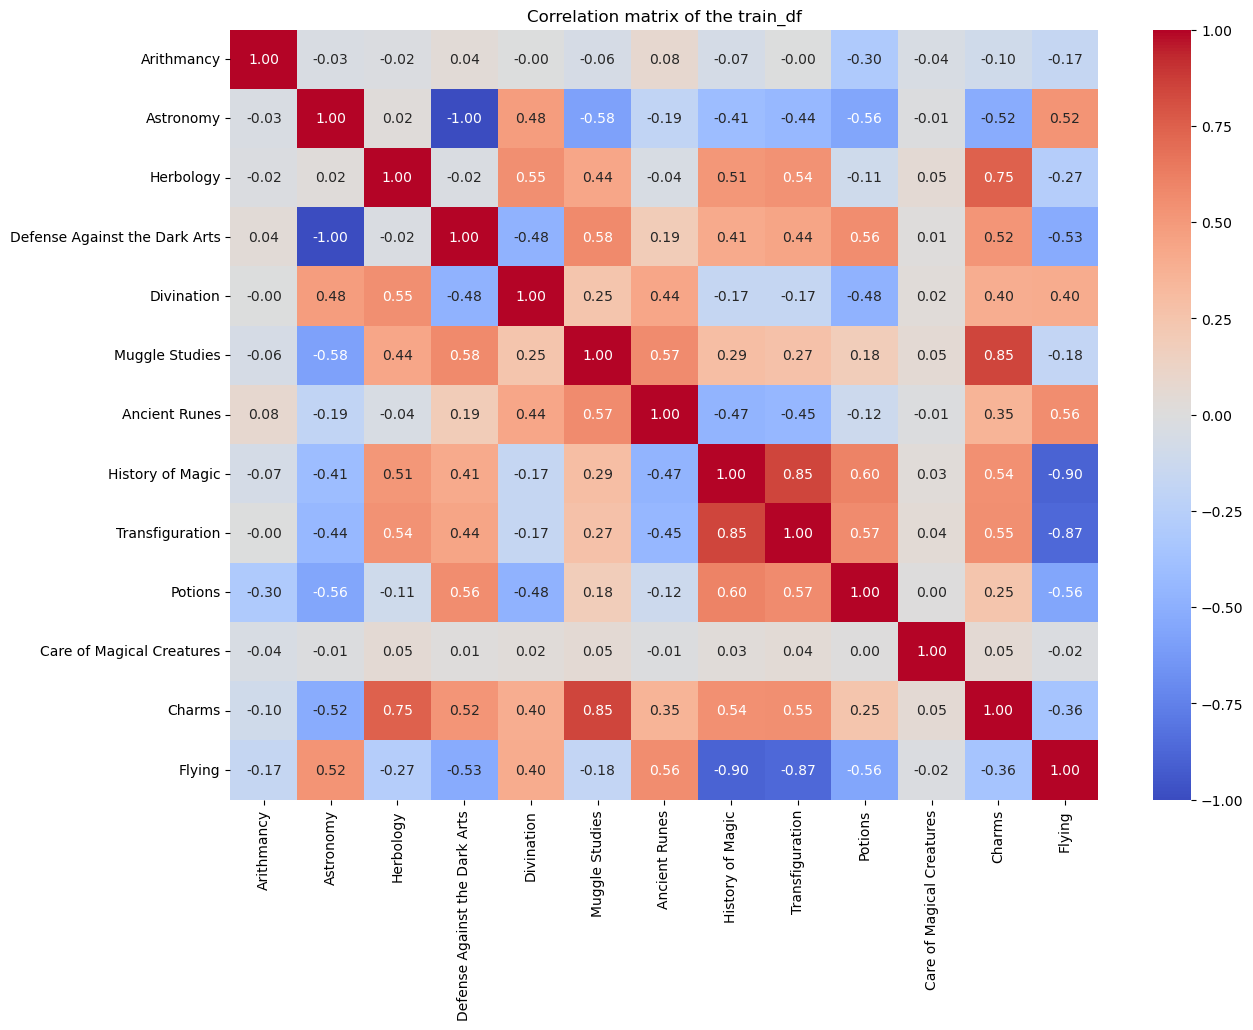

In [47]:
corr_matrix = numerical_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation matrix of the train_df')
plt.show()

The heatmap visualizes the correlation matrix of the train_df. The correlation coefficient ranges from -1 to 1. If the value is close to 1,   
it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.  

Observations:   

`Astronomy` and `Defense Against the Dark Arts` are perfectly negatively correlated with a correlation of -1. This implies that they provide similar information,   
so we probably don't need to include both in our model.
Other pairs of features do not seem to be strongly correlated with each other.

#### Plot histograms of the numerical variables


Now let's check the distributions of the numerical variables. This will help us to understand the spread and skewness of the data. We will use histograms for this purpose.

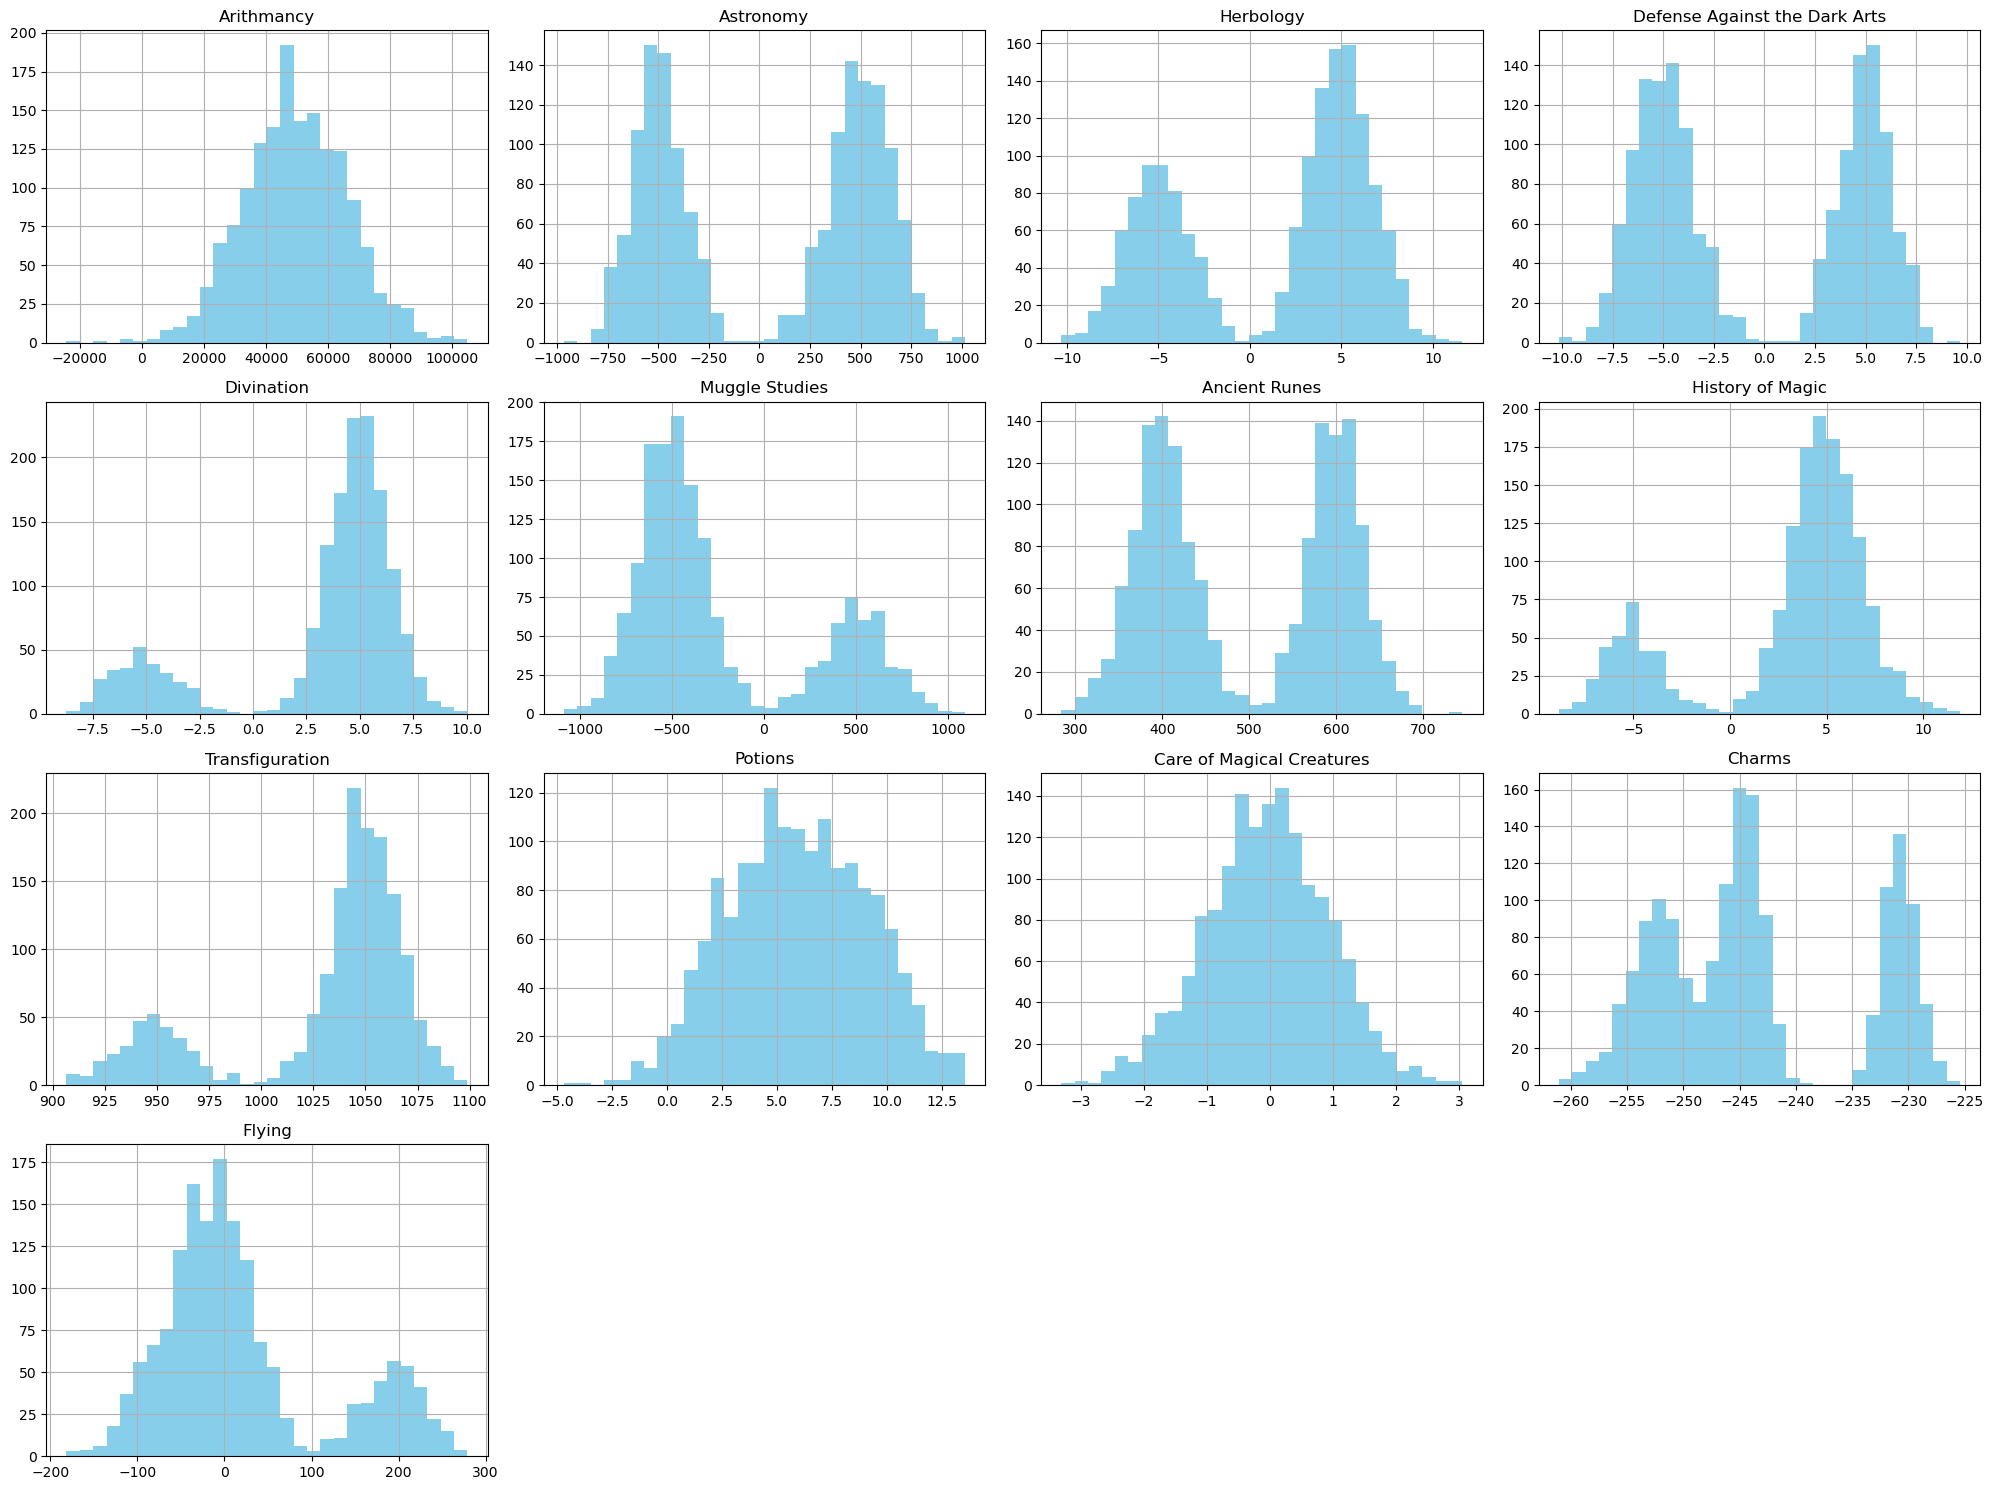

In [48]:
train_df.hist(bins=30, figsize=(20,15), color='skyblue')
plt.tight_layout()
plt.show()

Observations:

Most of the features seem to have a roughly normal (gaussian) distribution, such as `Arithmancy`, `Ancient Runes`, `Transfiguration`, and `Potions`.  
Some features like `Astronomy`,`Muggle Studies`, `Charms`, and `Flying` show a more bimodal distribution.  
`Defense Against the Dark Arts`, `Herbology`, `History of Magic`, `Divination`, and `Care of Magical Creatures` seem to be somewhat evenly spread across their ranges.  

#### Analyze the Categorical Variables 

We have First Name, Last Name, Best Hand, and Birthday. Out of these, Best Hand seems to be the most relevant for our analysis,   
as names and birthdays are usually not good predictors due to their low predictive power. Let's examine the Best Hand feature.

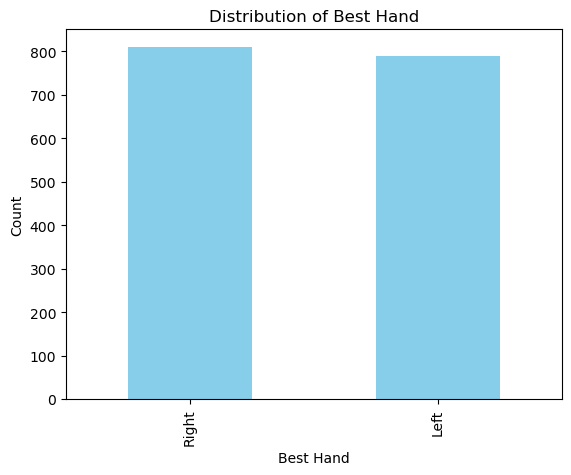

In [49]:
train_df['Best Hand'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Best Hand')
plt.ylabel('Count')
plt.title('Distribution of Best Hand')
plt.show()

The `Best Hand` feature shows that most of the students are right-handed, with a smaller proportion being left-handed. This could potentially be a useful feature for our model, as there might be some correlation between handedness and the Hogwarts house.

### Conclusion

In conclusion, after performing exploratory data analysis on this train_df, the following features seem to be the most promising for a logistic regression model:

**Numerical features:**    
Based on the correlation heatmap and the histogram distributions, we might consider using `Arithmancy`, `Herbology`, `Divination`, `Muggle Studies`, `Ancient Runes`, `History of Magic`, `Transfiguration`, `Potions`, `Care of Magical Creatures`, `Charms`, and `Flying`. While `Astronomy` and `Defense Against the Dark Arts` are strongly correlated, we could choose to include only one of them to avoid multicollinearity.

**Categorical feature:**   
`Best Hand` could be a useful feature. We can convert it into a binary feature (0 for 'Left', 1 for 'Right') using one-hot encoding.

### Data Preprocessing

With our exploratory data analysis complete, we can now preprocess the data for our logistic regression model. We'll perform the following steps:

1. **Handle Missing Values:** Fill missing values with mean imputation.
2. **Handle Non-Numerical Columns:** Perform one-hot encoding on the 'Best Hand' column and label encoding on the 'Hogwarts House' column.
3. **Normalize the train_df:** Normalize the features to have a mean of 0 and a standard deviation of 1.
4. **Split the train_df:** Split the data into a training set and a test set.


In [61]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Extracting features and target from training data
X_train = train_df.drop(columns=["Hogwarts House", "First Name", "Last Name", "Birthday"])
y_train = train_df["Hogwarts House"]

# Define numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# Preprocessing for numerical data: imputation and scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: imputation and one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Convert the preprocessed training data back to dataframe for clarity
X_train_df = pd.DataFrame(X_train_preprocessed)

# Display the preprocessed training data
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.531178,-1.031530,0.877019,1.027095,0.372876,1.039856,0.355871,0.510225,0.214294,-0.692470,0.802093,1.204930,-0.500486,1.0,0.0
1,1.067955,-1.155940,-1.386890,1.151240,-2.141914,-0.536647,-1.210158,0.253071,0.652690,0.416968,0.151091,-1.003297,-1.387362,0.0,1.0
2,-1.571194,-0.795386,1.263110,0.791454,0.717948,1.855449,1.022321,0.126863,1.319650,0.891682,-0.481907,1.825755,0.086700,1.0,0.0
3,-1.027749,1.266962,-1.485405,-1.266494,0.203504,-0.639745,0.275041,-1.787159,-2.518125,-1.644746,0.040849,-1.534279,1.830738,1.0,0.0
4,0.638715,0.761043,-1.741160,-0.417623,-0.232094,-0.447215,0.991321,-1.474777,-2.128087,-0.525432,-0.219889,-1.481955,1.393652,1.0,0.0


## V.3 Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
# from sklearn.multiclass import OneVsAllClassifier

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

# Assume X is your feature matrix and y is your target vector with multiple classes
ova_classifier = OneVsOneClassifier(LogisticRegression())
ova_classifier.fit(X_train_preprocessed, y_train)


OneVsOneClassifier(estimator=LogisticRegression())

In [73]:
test_df = pd.read_csv('data/dataset_test.csv')
test_df

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,NaN,Rico,Sargent,2001-10-06,Right,41642.0,696.096071,3.020172,-6.960961,7.996,-365.151850,393.138185,4.207691,1046.742736,3.668983,0.373853,-244.48172,-13.62
1,1,NaN,Tamara,Shackelford,1998-01-08,Left,45352.0,-370.844655,2.965226,3.708447,6.349,522.580486,602.853051,6.460017,1048.053878,8.514622,0.577432,-231.29200,-26.26
2,2,NaN,Staci,Crandall,1998-09-15,Left,43502.0,320.303990,-6.185697,-3.203040,4.619,-630.073207,588.071795,-5.565818,936.437358,1.850829,-1.647150,-252.99343,200.15
3,3,NaN,Dee,Gavin,2001-05-10,Right,61831.0,407.202928,4.962442,NaN,NaN,-449.179806,427.699966,NaN,1043.397718,4.656573,1.164708,-244.01660,-11.15
4,4,NaN,Gregory,Gustafson,1999-02-01,Right,NaN,288.337747,3.737656,-2.883377,4.886,-449.732166,385.712782,2.876347,1051.377936,2.750586,0.102104,-243.99806,-7.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,NaN,Maria,Kidwell,1999-02-06,Left,45857.0,-554.181932,-5.647655,5.541819,-3.799,-591.764651,392.973420,7.048482,1047.648405,10.408749,1.882786,-248.39978,-94.89
396,396,NaN,Frederic,Koonce,1997-11-11,Left,51842.0,632.233530,6.754862,-6.322335,3.294,-221.848397,319.360250,3.921402,1035.681313,-0.169741,-1.074303,-246.87982,-15.53
397,397,NaN,Eugene,Peralta,1998-11-14,Right,61982.0,292.108738,5.234530,-2.921087,4.230,-787.036050,433.259967,3.898160,1069.794110,6.495579,-2.286537,-244.01333,1.25
398,398,NaN,Allan,Bentley,1998-10-13,Left,56020.0,-726.418553,6.735582,7.264186,3.908,511.960762,613.391514,7.244499,1042.058804,7.554259,-0.788817,-228.24290,-18.27


In [74]:
test_df = test_df.drop(columns=["Hogwarts House", "First Name", "Last Name", "Birthday"], axis=0)
test_df

,Index,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Right,41642.0,696.096071,3.020172,-6.960961,7.996,-365.151850,393.138185,4.207691,1046.742736,3.668983,0.373853,-244.48172,-13.62
1,1,Left,45352.0,-370.844655,2.965226,3.708447,6.349,522.580486,602.853051,6.460017,1048.053878,8.514622,0.577432,-231.29200,-26.26
2,2,Left,43502.0,320.303990,-6.185697,-3.203040,4.619,-630.073207,588.071795,-5.565818,936.437358,1.850829,-1.647150,-252.99343,200.15
3,3,Right,61831.0,407.202928,4.962442,NaN,NaN,-449.179806,427.699966,NaN,1043.397718,4.656573,1.164708,-244.01660,-11.15
4,4,Right,NaN,288.337747,3.737656,-2.883377,4.886,-449.732166,385.712782,2.876347,1051.377936,2.750586,0.102104,-243.99806,-7.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,Left,45857.0,-554.181932,-5.647655,5.541819,-3.799,-591.764651,392.973420,7.048482,1047.648405,10.408749,1.882786,-248.39978,-94.89
396,396,Left,51842.0,632.233530,6.754862,-6.322335,3.294,-221.848397,319.360250,3.921402,1035.681313,-0.169741,-1.074303,-246.87982,-15.53
397,397,Right,61982.0,292.108738,5.234530,-2.921087,4.230,-787.036050,433.259967,3.898160,1069.794110,6.495579,-2.286537,-244.01333,1.25
398,398,Left,56020.0,-726.418553,6.735582,7.264186,3.908,511.960762,613.391514,7.244499,1042.058804,7.554259,-0.788817,-228.24290,-18.27


In [75]:
test_df_prep = preprocessor.fit_transform(test_df)
test_df_prep

array([[-0.55389091,  1.26648974,  0.31506222, ..., -0.38906765,
         0.        ,  1.        ],
       [-0.30981698, -0.84482839,  0.30405626, ..., -0.52202666,
         1.        ,  0.        ],
       [-0.43152501,  0.52285271, -1.52891229, ...,  1.85955967,
         1.        ,  0.        ],
       ...,
       [ 0.78423946,  0.46705847,  0.75860738, ..., -0.23265146,
         0.        ,  1.        ],
       [ 0.39201069, -1.54845662,  1.05927446, ..., -0.43798058,
         1.        ,  0.        ],
       [-0.23745005, -1.56729762,  1.15728129, ..., -0.33815612,
         1.        ,  0.        ]])

In [76]:
preds = ova_classifier.predict(test_df_prep)
preds[:10]

array(['Hufflepuff', 'Ravenclaw', 'Gryffindor', 'Hufflepuff',
       'Hufflepuff', 'Slytherin', 'Ravenclaw', 'Hufflepuff', 'Ravenclaw',
       'Hufflepuff'], dtype=object)

In [77]:
preds.shape

(400,)

In [78]:
truth_df = pd.read_csv('data/dataset_truth.csv')
truth_df

,Index,Hogwarts House
0,0,Hufflepuff
1,1,Ravenclaw
2,2,Gryffindor
3,3,Hufflepuff
4,4,Hufflepuff
...,...,...
395,395,Slytherin
396,396,Hufflepuff
397,397,Hufflepuff
398,398,Ravenclaw


In [79]:
acc = (preds == truth_df['Hogwarts House']).mean()
acc

0.99